 **DAV Team Project**

SUBMITTED BY:
 
Sambit Basu , AB-1264 , 19001570034

Sarvesh Sharma , AB-1271 , 19001570036

Tushar Gaurav , AB-1253 , 19001570050

Program Name: B.Sc. (Hons.) Computer Science
 
Semester: 5

Title of The Paper: DATA ANALYSIS AND VISUALISATION (DAV)

#COVID-19 India

##Importing important libraries and the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving covid_19_india.csv to covid_19_india.csv


In [ ]:
covid=pd.read_csv('/content/covid_19_india.csv')
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
plt.rc('figure',figsize=(13,13))
font_options={'family':'serif','weight':'normal','size':15}
plt.rc('font',**font_options)

##The work

In [ ]:
covid.drop(['ConfirmedIndianNational','ConfirmedForeignNational','Sno','Time'],inplace=True,axis=1)

In [ ]:
covid.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999


###Q1

For each Indian state, find maximum cases reported for confirmed, deaths and recovered individually along with date on which these cases were reported for any three months of year 2020. Display the result in the self-explanatory format.

In [ ]:
q1=pd.DataFrame(columns=[['August','August','August','August','August','August',
                          'September','September','September','September','September','September',
                         'October','October','October','October','October','October'],
                         ['Confirmed','Confirmed','Deaths','Deaths','Cured',
                          'Cured','Confirmed','Confirmed','Deaths','Deaths',
                          'Cured','Cured','Confirmed','Confirmed','Deaths',
                          'Deaths','Cured','Cured'],
                         ['Date','Number','Date','Number','Date','Number',
                          'Date','Number','Date','Number','Date','Number',
                          'Date','Number','Date','Number','Date','Number']])

In [ ]:
q1.index.name='State'
q1

Empty DataFrame
Columns: [(August, Confirmed, Date), (August, Confirmed, Number), (August, Deaths, Date), (August, Deaths, Number), (August, Cured, Date), (August, Cured, Number), (September, Confirmed, Date), (September, Confirmed, Number), (September, Deaths, Date), (September, Deaths, Number), (September, Cured, Date), (September, Cured, Number), (October, Confirmed, Date), (October, Confirmed, Number), (October, Deaths, Date), (October, Deaths, Number), (October, Cured, Date), (October, Cured, Number)]
Index: []

In [ ]:
for sta in covid[(covid['Date']==datetime.date(2020,8,31)) | (covid['Date']==datetime.date(2020,9,30)) | (covid['Date']==datetime.date(2020,10,31))]['State/UnionTerritory'].unique():
  Li=[]
  for z in range(8,11):
    if z==9:
      fin=31
    else:
      fin=32
    conf,deat,cure=pd.Series(),pd.Series(),pd.Series()
    for d in range(2,fin):
      conf.loc[datetime.date(2020,z,d-1)]=int(covid[(covid['State/UnionTerritory']==sta) & (covid['Date']==datetime.date(2020,z,d))].Confirmed)-int(covid[(covid['State/UnionTerritory']==sta) & (covid['Date']==datetime.date(2020,z,d-1))].Confirmed)
      deat.loc[datetime.date(2020,z,d-1)]=int(covid[(covid['State/UnionTerritory']==sta) & (covid['Date']==datetime.date(2020,z,d))].Deaths)-int(covid[(covid['State/UnionTerritory']==sta) & (covid['Date']==datetime.date(2020,z,d-1))].Deaths)
      cure.loc[datetime.date(2020,z,d-1)]=int(covid[(covid['State/UnionTerritory']==sta) & (covid['Date']==datetime.date(2020,z,d))].Cured)-int(covid[(covid['State/UnionTerritory']==sta) & (covid['Date']==datetime.date(2020,z,d-1))].Cured)
    Li.extend([str(conf.idxmax()),conf.max()])
    Li.extend([str(deat.idxmax()),deat.max()])
    Li.extend([str(cure.idxmax()),cure.max()])
  q1.loc[sta]=Li

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
q1.head(12)

August         ...     October       
                                           Confirmed         ...       Cured       
                                                Date Number  ...        Date Number
State                                                        ...                   
Andaman and Nicobar Islands               2020-08-14    149  ...  2020-10-19     24
Andhra Pradesh                            2020-08-26  10830  ...  2020-10-03   7798
Arunachal Pradesh                         2020-08-30    157  ...  2020-10-07    431
Assam                                     2020-08-12   4593  ...  2020-10-25   2961
Bihar                                     2020-08-09   4157  ...  2020-10-05   1537
Chandigarh                                2020-08-29    261  ...  2020-10-06    238
Chhattisgarh                              2020-08-29   1513  ...  2020-10-06   3484
Dadra and Nagar Haveli and Daman and Diu  2020-08-09    108  ...  2020-10-02     20
Delhi                                     2020-08-30   2024  ...  2020-10-30   4433
Goa                                       2020-08-13    570  ...  2020-10-06    594
Gujarat                                   2020-08-29   1282  ...  2020-10-07   1546
Haryana                                   2020-08-26   1397  ...  2020-10-01   2161

[12 rows x 18 columns]

###Q2

Use appropriate year-month string date conversions.

In [ ]:
covid.Date=[pd.to_datetime(d) for d in covid.Date]

In [ ]:
covid.Date=[datetime.datetime.date(f) for f in covid.Date]

In [ ]:
type(covid.Date[0])

datetime.date

In [ ]:
#Q2 a Find the state that ended 2020 with the most number of cured cases
covid.loc[covid[covid['Date']==datetime.date(2020,12,31)].Cured.idxmax()]['State/UnionTerritory']

'Maharashtra'

In [ ]:
#2 b Find the rate of increase in confirmed cases after Durga Pujo in West Bengal and Chhath puja in Bihar
wb7oct=int(covid[(covid['State/UnionTerritory']=='West Bengal') & (covid['Date']==datetime.date(2020,10,7))].Confirmed.values)
wb17oct=int(covid[(covid['State/UnionTerritory']=='West Bengal') & (covid['Date']==datetime.date(2020,10,17))].Confirmed.values)
wb27oct=int(covid[(covid['State/UnionTerritory']=='West Bengal') & (covid['Date']==datetime.date(2020,10,27))].Confirmed.values)
k,y=wb17oct-wb7oct,wb27oct-wb17oct
wbdpr=[(k/wb7oct)*100,(y/wb17oct)*100,((y-k)/k)*100]

br8nov=int(covid[(covid['State/UnionTerritory']=='Bihar') & (covid['Date']==datetime.date(2020,11,8))].Confirmed.values)
br13nov=int(covid[(covid['State/UnionTerritory']=='Bihar') & (covid['Date']==datetime.date(2020,11,13))].Confirmed.values)
br18nov=int(covid[(covid['State/UnionTerritory']=='Bihar') & (covid['Date']==datetime.date(2020,11,18))].Confirmed.values)
a,b=br13nov-br8nov,br18nov-br13nov
brcpr=[(a/br8nov)*100,(b/br13nov)*100,((b-a)/a)*100]

pujorates=pd.DataFrame(index=['West Bengal','Bihar'],columns=['Rate Before','Rate After','Increase Rate'])
pujorates.loc['West Bengal']=wbdpr
pujorates.loc['Bihar']=brcpr

In [ ]:
pujorates

,Rate Before,Rate After,Increase Rate
West Bengal,13.0443,12.9743,12.4381
Bihar,1.624,1.11079,-30.4905


###Q3

Create subplots (line graph) for showing total number of cured cases month-wise from April 2020 to March
2021 in four states namely Karnataka, Gujarat, Haryana, and Uttar Pradesh.


In [ ]:
ka,guj,har,up=[],[],[],[]
for i in range(4,13):
  if i in [4,6,9,11]:
    ka.append(int(covid[(covid['State/UnionTerritory']=='Karnataka') & (covid['Date']==datetime.date(2020,i,30))].Cured.values))
    guj.append(int(covid[(covid['State/UnionTerritory']=='Gujarat') & (covid['Date']==datetime.date(2020,i,30))].Cured.values))
    har.append(int(covid[(covid['State/UnionTerritory']=='Haryana') & (covid['Date']==datetime.date(2020,i,30))].Cured.values))
    up.append(int(covid[(covid['State/UnionTerritory']=='Uttar Pradesh') & (covid['Date']==datetime.date(2020,i,30))].Cured.values))
  else:
    ka.append(int(covid[(covid['State/UnionTerritory']=='Karnataka') & (covid['Date']==datetime.date(2020,i,31))].Cured.values))
    guj.append(int(covid[(covid['State/UnionTerritory']=='Gujarat') & (covid['Date']==datetime.date(2020,i,31))].Cured.values))
    har.append(int(covid[(covid['State/UnionTerritory']=='Haryana') & (covid['Date']==datetime.date(2020,i,31))].Cured.values))
    up.append(int(covid[(covid['State/UnionTerritory']=='Uttar Pradesh') & (covid['Date']==datetime.date(2020,i,31))].Cured.values))
    
for i in range(1,4):
  if i in [1,3]:
    ka.append(int(covid[(covid['State/UnionTerritory']=='Karnataka') & (covid['Date']==datetime.date(2021,i,30))].Cured.values))
    guj.append(int(covid[(covid['State/UnionTerritory']=='Gujarat') & (covid['Date']==datetime.date(2021,i,30))].Cured.values))
    har.append(int(covid[(covid['State/UnionTerritory']=='Haryana') & (covid['Date']==datetime.date(2021,i,30))].Cured.values))
    up.append(int(covid[(covid['State/UnionTerritory']=='Uttar Pradesh') & (covid['Date']==datetime.date(2021,i,30))].Cured.values))
  else:
    ka.append(int(covid[(covid['State/UnionTerritory']=='Karnataka') & (covid['Date']==datetime.date(2021,i,28))].Cured.values))
    guj.append(int(covid[(covid['State/UnionTerritory']=='Gujarat') & (covid['Date']==datetime.date(2021,i,28))].Cured.values))
    har.append(int(covid[(covid['State/UnionTerritory']=='Haryana') & (covid['Date']==datetime.date(2021,i,28))].Cured.values))
    up.append(int(covid[(covid['State/UnionTerritory']=='Uttar Pradesh') & (covid['Date']==datetime.date(2021,i,28))].Cured.values))


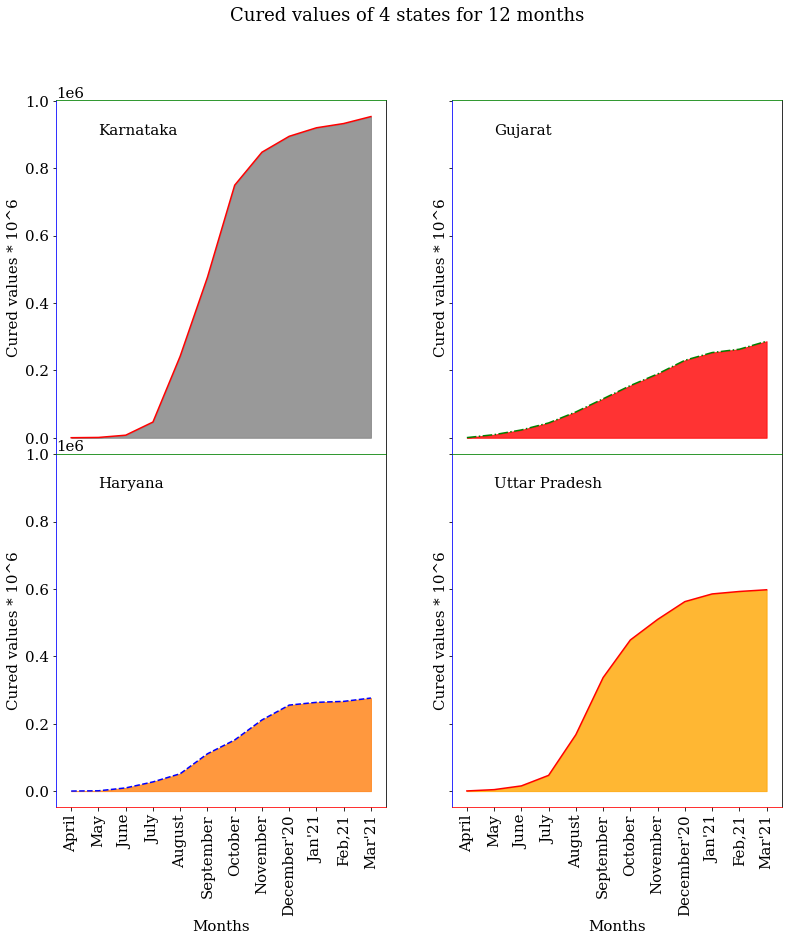

In [ ]:
fig,axes=plt.subplots(2,2,sharey=True,sharex=True)
states=['Karnataka','Gujarat','Haryana','Uttar Pradesh']
months=["April","May","June",
        "July","August","September",
        "October","November","December'20",
        "Jan'21","Feb,21","Mar'21"]
c=0
hy=[ka,guj,har,up]
colours=['r-','g-.','b--','r-']
col=['grey','r','C1','orange']
for f in range(2):
  for t in range(2):
    axes[f,t].plot(months,hy[c],colours[c])
    axes[f,t].text(1,900000,states[c])
    axes[f,t].set_xticklabels(months,rotation='vertical') 
    axes[f,t].fill_between(months,hy[c],color=col[c],alpha=0.8)
    axes[f,t].spines['top'].set_color('green')
    axes[f,t].spines['bottom'].set_color('red')
    axes[f,t].spines['right'].set_color('black')
    axes[f,t].spines['left'].set_color('blue')
    axes[f,t].set_xlabel('Months')
    axes[f,t].set_ylabel('Cured values * 10^6')
    c+=1
fig.suptitle('Cured values of 4 states for 12 months')
plt.subplots_adjust(wspace=0.2,hspace=0)

###Q4

Compare the deaths due to Covid-19 in the months of May 2020 and May 2021 for the states namely
Karnataka, Delhi, and Madhya Pradesh using stacked bars

In [ ]:
types=['May-2020','May-2021']
karn,delhi,mad=pd.Series(dtype='int64',index=types),pd.Series(dtype='int64',index=types),pd.Series(dtype='int64',index=types)

In [ ]:
karn['May-2020']=int(covid[(covid['State/UnionTerritory']=='Karnataka') & (covid.Date==datetime.date(2020,5,31))].Deaths.values)-int(covid[(covid['State/UnionTerritory']=='Karnataka') & (covid.Date==datetime.date(2020,4,30))].Deaths.values)
karn['May-2021']=int(covid[(covid['State/UnionTerritory']=='Karnataka') & (covid.Date==datetime.date(2021,5,31))].Deaths.values)-int(covid[(covid['State/UnionTerritory']=='Karnataka') & (covid.Date==datetime.date(2021,4,30))].Deaths.values)
delhi['May-2020']=int(covid[(covid['State/UnionTerritory']=='Delhi') & (covid.Date==datetime.date(2020,5,31))].Deaths.values)-int(covid[(covid['State/UnionTerritory']=='Delhi') & (covid.Date==datetime.date(2020,4,30))].Deaths.values)
delhi['May-2021']=int(covid[(covid['State/UnionTerritory']=='Delhi') & (covid.Date==datetime.date(2021,5,31))].Deaths.values)-int(covid[(covid['State/UnionTerritory']=='Delhi') & (covid.Date==datetime.date(2021,4,30))].Deaths.values)
mad['May-2020']=int(covid[(covid['State/UnionTerritory']=='Madhya Pradesh') & (covid.Date==datetime.date(2020,5,31))].Deaths.values)-int(covid[(covid['State/UnionTerritory']=='Madhya Pradesh') & (covid.Date==datetime.date(2020,4,30))].Deaths.values)
mad['May-2021']=int(covid[(covid['State/UnionTerritory']=='Madhya Pradesh') & (covid.Date==datetime.date(2021,5,31))].Deaths.values)-int(covid[(covid['State/UnionTerritory']=='Madhya Pradesh') & (covid.Date==datetime.date(2021,4,30))].Deaths.values)

In [ ]:
q4=pd.DataFrame([karn,delhi,mad])
q4.index=['Karnataka','Delhi','Madhya Pradesh']
q4

,May-2020,May-2021
Karnataka,27,13373
Delhi,360,8379
Madhya Pradesh,213,2500


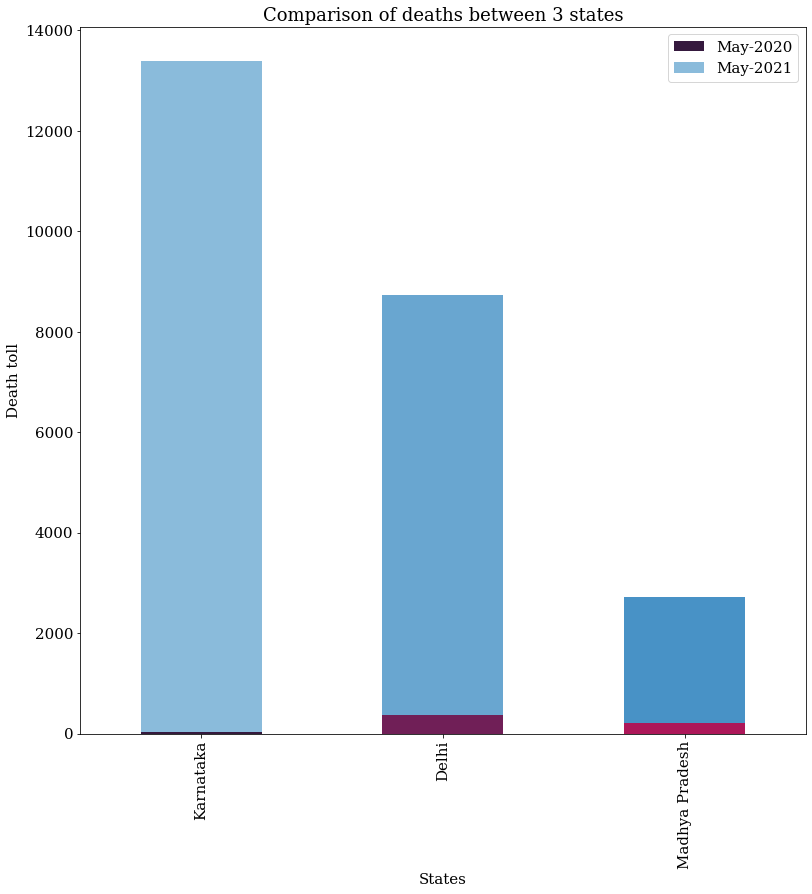

In [ ]:
q4.plot.bar(stacked=True,xlabel='States',ylabel='Death toll',title='Comparison of deaths between 3 states',color=[sns.color_palette('rocket'),sns.color_palette('Blues_d')])


###Q5

Make a graph to show the month wise relation between number of confirmed
Covid-19 cases and Deaths in Uttar Pradesh.

In [ ]:
d,c=list(),list()
for f in range(len(covid)):
  if covid.loc[f]['State/UnionTerritory']=='Uttar Pradesh':
    if covid.loc[f].Date.month in [1,3,5,7,8,10,12]:
      if covid.loc[f].Date.day==31:
        d.append(covid.loc[f].Deaths)
        c.append(covid.loc[f].Confirmed)
    elif covid.loc[f].Date.month==2:
      if covid.loc[f].Date.day==28:
        d.append(covid.loc[f].Deaths)
        c.append(covid.loc[f].Confirmed)
    else:
      if covid.loc[f].Date.day==30:
        d.append(covid.loc[f].Deaths)
        c.append(covid.loc[f].Confirmed)

In [ ]:
len(c),len(d)

(17, 17)

In [ ]:
c.append(int(covid[(covid['State/UnionTerritory']=='Uttar Pradesh') & (covid['Date']==datetime.date(2021,8,11))].Confirmed.values))
d.append(int(covid[(covid['State/UnionTerritory']=='Uttar Pradesh') & (covid['Date']==datetime.date(2021,8,11))].Deaths.values))

In [ ]:
len(c),len(d)

(18, 18)

Text(0.5, 1.0, 'Relation between confirmed and deaths in Uttar Pradesh')

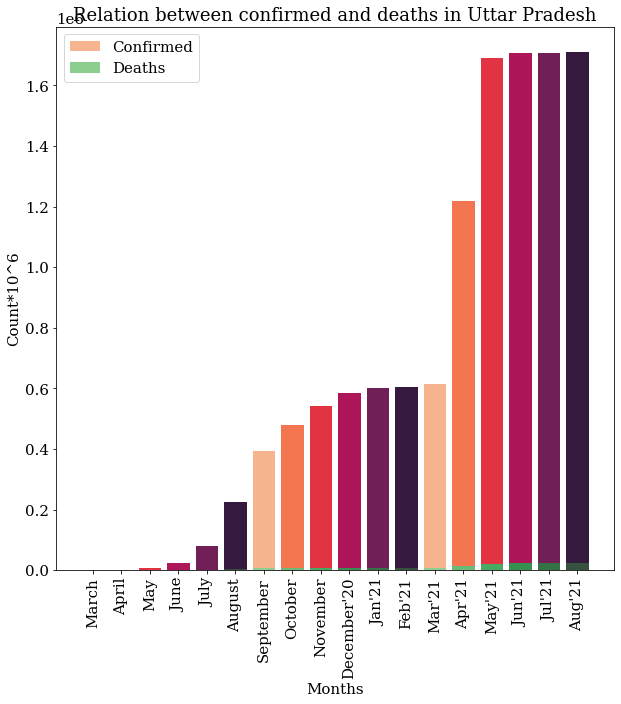

In [ ]:
fig=plt.figure(figsize=[10,10])
ax=fig.add_subplot(1,1,1)
months=["March","April","May","June",
        "July","August","September",
        "October","November","December'20",
        "Jan'21","Feb'21","Mar'21","Apr'21",
        "May'21","Jun'21","Jul'21","Aug'21"]
ax.set_xticklabels(months,rotation='vertical')
ax.bar(months,c,color=sns.color_palette('rocket_r'))
ax.bar(months,d,color=sns.color_palette('Greens_d'))
ax.legend(['Confirmed','Deaths'])
ax.set_xlabel('Months')
ax.set_ylabel('Count*10^6')
ax.set_title('Relation between confirmed and deaths in Uttar Pradesh')